In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_csv("titanic_train.csv")
df.head()
len(df)

891

In [3]:
profile = df.profile_report()
profile = df.profile_report(title='Pandas Profiling Report before data profiling')
profile.to_file(output_file="output_before_profiling.html")

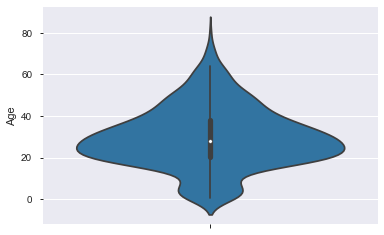

In [4]:
ax = sns.violinplot(y=df["Age"])

## Observations from 1st Profiling
1. Cabin has around 78% vaulues missing and high cardinal value. It can be dropped
2. Passenger Id may not play a role in EDA. So it can also be dropped
3. Ticket number also may not play role. So it can also bhee dropped
4. Age has got 20% values as missing. We cannot interpolate this data so we will take fillna option using mean of of age as from above plot it is celar that most of the values are aroung mean

In [5]:
# We will use fillna to fill missing in Age
df["Age"]=df["Age"].fillna(round(df["Age"].mean()))


In [6]:
# Remove not required columns
df.drop(['Cabin','PassengerId','Ticket'],axis=1, inplace=True)
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [7]:
profile = df.profile_report()
profile = df.profile_report(title='Pandas Profiling Report after data profiling')
profile.to_file(output_file="TitanicEDA_output_after_profiling.html")

## After feature enginenering the data looks more clean and normal as below
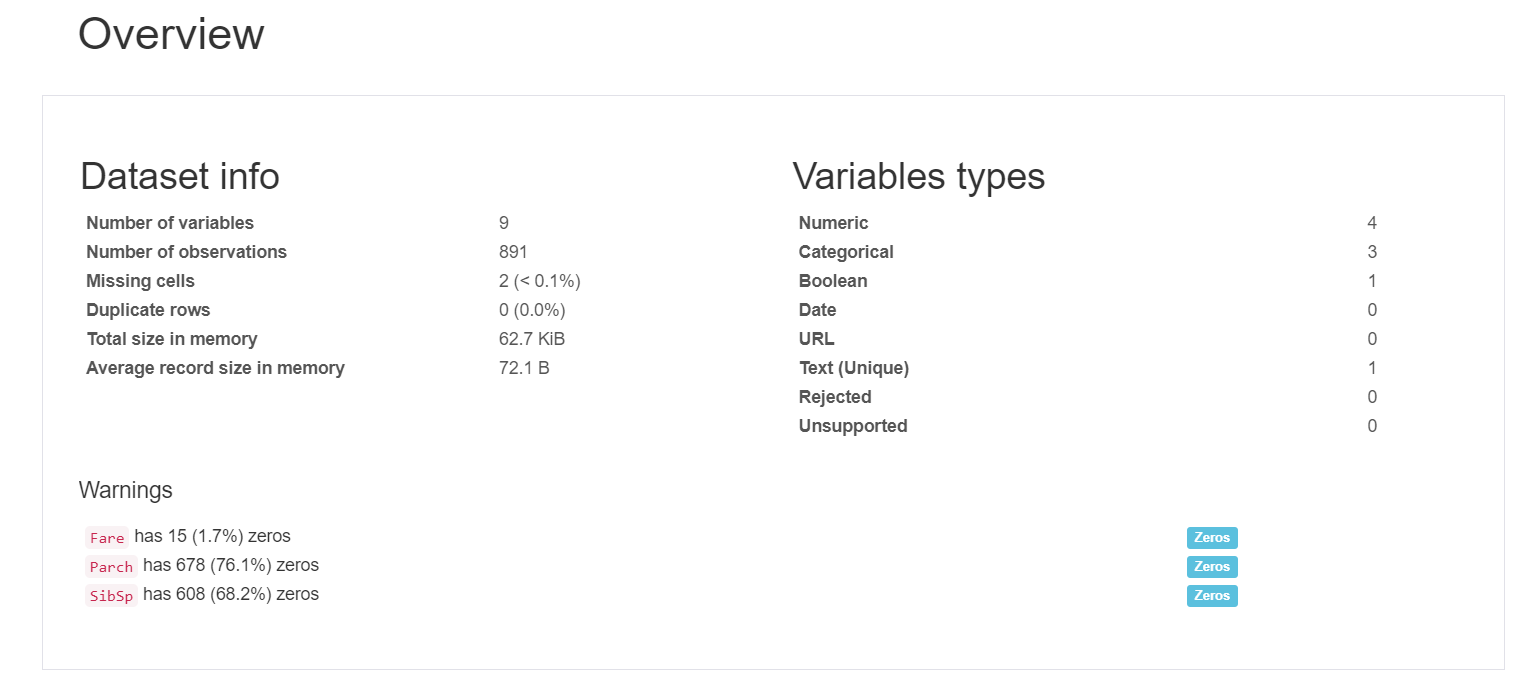

## Let's start get Q&A

Q: Can we seperate and get count of survived and not survived people

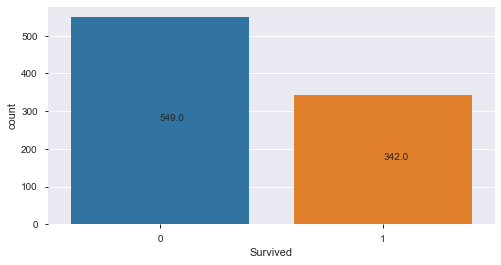

In [8]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x="Survived",data=df)

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()/2))

Q2: Can we get survival count based on Male/Female?

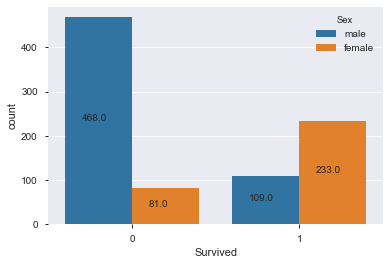

In [9]:
ax=sns.countplot(x="Survived",data=df, hue="Sex")
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+.1, p.get_height()/2))

In [10]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [11]:
df["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [12]:
df_alone_people=df[df["SibSp"]==0]
len(df_alone_people)

608

## Obsersvation :
around 65.5% people who travelled alone (without siblings and spouse) have been died/

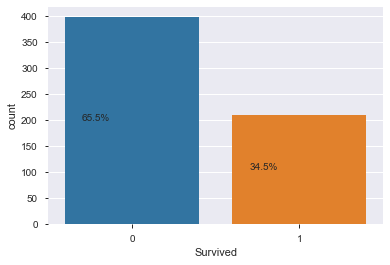

In [13]:
ax1=sns.countplot(x="Survived",data=df_alone_people)
for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format(p.get_height()/len(df_alone_people)*100), (p.get_x()+.1, p.get_height()/2))

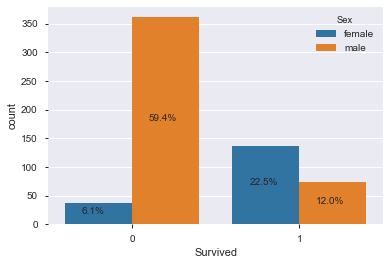

In [14]:
ax1=sns.countplot(x="Survived",data=df_alone_people,hue="Sex")
for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format(p.get_height()/len(df_alone_people)*100), (p.get_x()+.1, p.get_height()/2))

## Observation
Most of the dead people who travelled alone are males. It means the rescue team has rescued more females

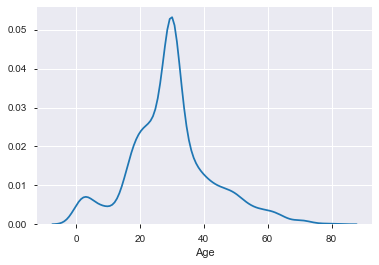

In [15]:
sns.distplot(df["Age"],bins=20, rug=False, hist=False)

In [16]:
df_male_col=pd.get_dummies(df["Sex"],drop_first=True)
len(df_male_col)

891

In [17]:
df=pd.concat([df,df_male_col],axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [18]:
# df_pclass=pd.get_dummies(df["Pclass"],drop_first=True)
# df_pclass
# df=pd.concat([df,df_pclass],axis=1)

In [19]:
# df_embarked=pd.get_dummies(df["Embarked"],drop_first=True)
# df=pd.concat([df,df_embarked],axis=1)
df.drop(["Pclass","Embarked"],inplace=True,axis=1)
df.head()

,Survived,Name,Sex,Age,SibSp,Parch,Fare,male
0,0,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,0
2,1,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,0
4,0,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1


In [20]:
model=linear_model.LogisticRegression()
#model.fit(df[["Age","Fare","male","Q","S"]],df["Survived"])
model.fit(df[["male"]],df["Survived"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
# prediction=model.predict(df[["Age","Fare","male","Q","S"]])
prediction=model.predict(df[["male"]])

In [22]:
# model.score(df[["Age","Fare","male","Q","S"]],df["Survived"])
model.score(df[["male"]],df["Survived"])

0.7867564534231201

In [23]:
confusion_matrix(df["Survived"],prediction)

array([[468,  81],
       [109, 233]])

In [24]:
(468+233)/(468+81+109+233)

0.7867564534231201

In [25]:
df_test=pd.read_csv("titanic_test.csv")
len(df_test)

418

In [26]:
df_test_finaltest=df_test[["PassengerId","Sex"]]


In [27]:
df_test_Sex=pd.get_dummies(df_test_finaltest["Sex"],drop_first=True)

In [28]:
df_test_finaltest=pd.concat([df_test_finaltest,df_test_Sex],axis=1)

In [29]:
df_test_finaltest.drop("Sex",axis=1,inplace=True)

In [30]:
df_test_finaltest.head(1)

,PassengerId,male
0,892,1


In [31]:
predicted_val=model.predict(df_test_finaltest[["male"]])
len(predicted_val)

418

In [32]:
# len(df_test_finaltest)
df_test_finaltest["Survived"]=predicted_val

# df_test_finaltest=pd.merge(df_test_finaltest,model.predict(df["male"]),how="left")
df_test_finaltest.drop(["male"],axis=True,inplace=True)

In [33]:
df_test_finaltest.to_csv("Final_Prediction.csv",index=False)

In [34]:
np.sqrt(len(df))

29.8496231131986

In [35]:
knn_model=KNeighborsClassifier(29)

In [36]:
knn_model.fit(df[["male"]],df["Survived"])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=29, p=2,
                     weights='uniform')

In [37]:
knn_model.score(df[["male"]],df["Survived"])

0.7867564534231201

In [38]:
df_test_knn=pd.read_csv("titanic_test.csv")


In [39]:
df_test_knn_male=pd.get_dummies(df_test_knn["Sex"],drop_first=True)

In [40]:
df_test_knn=pd.concat([df_test_knn,df_test_knn_male],axis=1)

In [41]:
df_test_knn["KnnSruvived"]=knn_model.predict(df_test_knn[["male"]])

In [42]:
df_test_knn[["PassengerId","KnnSruvived"]].to_csv("KnnAlgoPred.csv",index=False)